Deep Learning with Keras, TensorFlow, and Anaconda
===========================
You will need to have Keras 1.2.1 and TensorFlow installed, both available as conda packages.

```
conda install -c conda-forge keras tensorflow
```

This is based on François Chollet's (author of Keras) Convolutional Neural Net example. <a href='http://twitter.com/fchollet'>@fchollet</a>
 
<table>
<tr><td>
<img src="https://keras.io/img/keras-logo-small.jpg" width=150>
</td>
<td>
<img src="https://www.tensorflow.org/_static/images/tensorflow/logo.png" width=150>
</td></tr>
</table>

Initial Jupyter Notebook and Keras setup
--------------------------------------

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/ijstokes/anaconda/envs/pycon17apps/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

from keras.datasets import mnist
from keras.models   import Sequential
from keras.layers   import Dense, Dropout, Activation, Flatten
from keras.layers   import Conv2D, MaxPooling2D
from keras.utils    import np_utils
from keras          import backend as K

Using TensorFlow backend.


Configure Keras to use TensorFlow and setup GPU
--------------------------------------------

In [5]:
# Limit GPU memory consumption to 30%
import tensorflow as tf
from   keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
set_session(tf.Session(config=config))

Setup training parameters
------------------------

In [6]:
batch_size         = 128
nb_classes         = 10
nb_epoch           = 10

img_rows, img_cols = 28, 28 # input image dimensions
nb_filters         = 32     # number of convolutional filters to use
pool_size          = (2, 2) # size of pooling area for max pooling
kernel_size        = (3, 3) # convolution kernel size

Load training and testing data
----------------------------

In [7]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


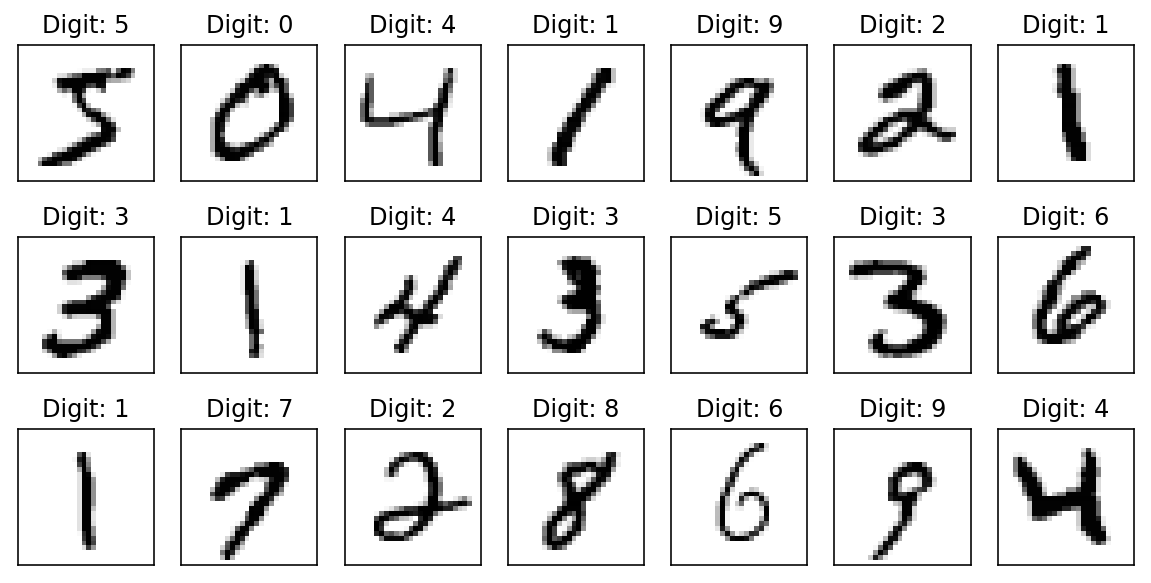

In [8]:
print(X_train.shape)
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title('Digit: %d' % y_train[i])
    plt.xticks([])
    plt.yticks([])

Clean up the MNIST data
----------------------

In [9]:
if K.image_dim_ordering() == 'th':
    X_train     = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test      = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train     = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test      = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [10]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

In [11]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test  = np_utils.to_categorical(y_test, nb_classes)

Use Keras to build the neural net topology in layers
-------------------------------------------------
Notice all the `.add()` methods that construct the topology

In [13]:
tf.device('/gpu:0')  # /gpu:0 = GTX 1080, /gpu:1 = Tesla K40
model = Sequential()

model.add(Conv2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

/Users/ijstokes/anaconda/envs/pycon17apps/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/Users/ijstokes/anaconda/envs/pycon17apps/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


In [14]:
import pydot_ng as pydot
pydot.find_graphviz()

{'circo': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/circo',
 'dot': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/dot',
 'fdp': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/fdp',
 'neato': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/neato',
 'sfdp': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/sfdp',
 'twopi': '/Users/ijstokes/anaconda/envs/pycon17apps/bin/twopi'}

In [15]:
from IPython.display       import SVG
from keras.utils.vis_utils import model_to_dot

Visualize Neural Net
-------------------
The following may not work.  You need to have `pydot` and `graphviz` installed and working together nicely.

If it fails all you're missing out on is a graphic of the neural net topology that you've created just above.

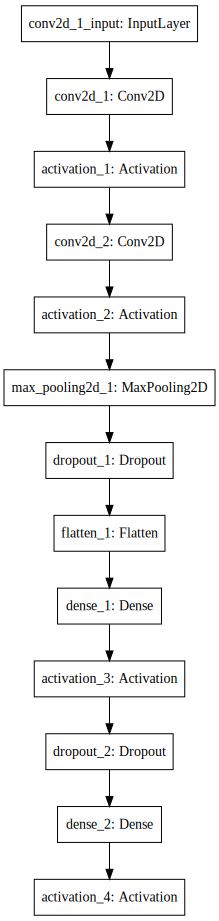

In [16]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Use the training set to train the model over 10 epochs
---------------------------------------------------

In [ ]:
%%time
history = model.fit(X_train, Y_train, 
                    batch_size      = batch_size, 
                    epochs          = nb_epoch,
                    verbose         = 1, 
                    validation_data = (X_test, Y_test)) # validation data used to track progress

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s - loss: 0.4817 - acc: 0.8515 - val_loss: 0.1042 - val_acc: 0.9668

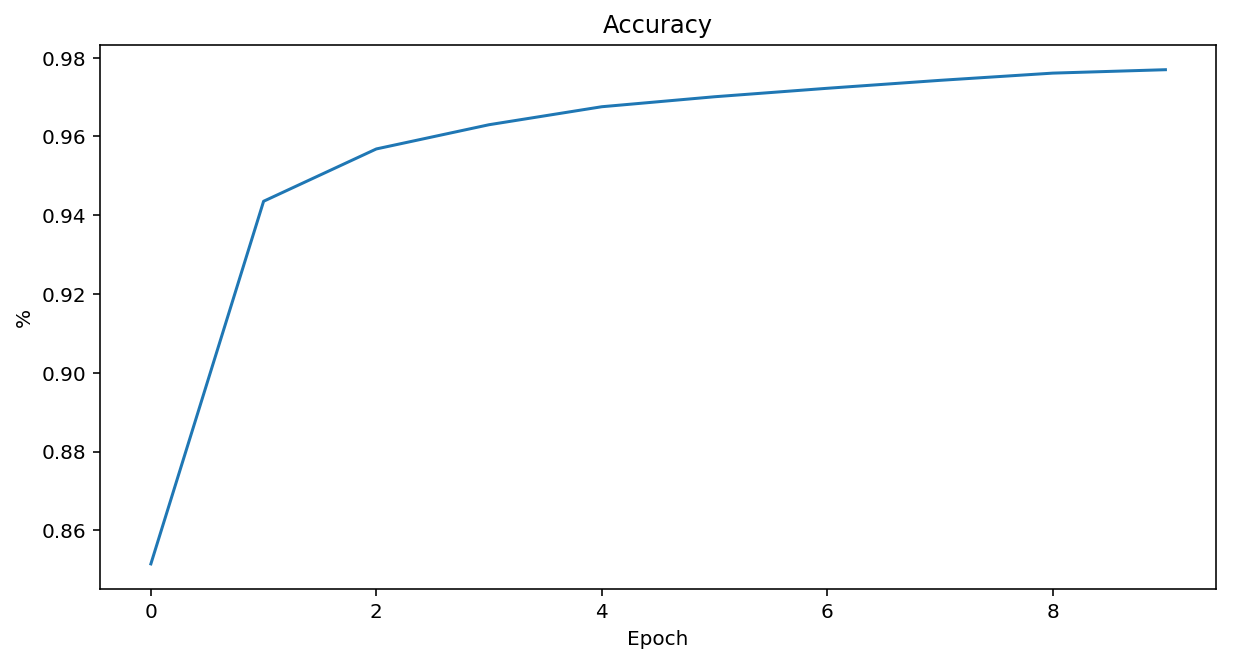

In [18]:
plt.plot(history.epoch, history.history['acc'])
plt.title('Accuracy');plt.xlabel('Epoch');plt.ylabel('%')

Model Training Success! To the Bank!
----------------------------------
We have a trained TF model with 97% accurracy, which is pretty good for a relatively quick setup.  Now we want to save that trained model so we don't have to re-run this again and again.

In [19]:
model.save('tf_digit_model_10epoch_10class_128batch.h5')

In [21]:
!ls -Flah *.h5

-rw-r--r--  1 ijstokes  staff   3.5M May 18 09:19 tf_digit_model_10epoch_10class_128batch.h5
